In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


path = 'C:/SandBox/Prosperity/first-round/data/prices_round_1_day_-2.csv'

In [25]:
df = pd.read_csv(path, sep=';')
df.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,AMETHYSTS,9996,1,9995.0,25.0,NaN,NaN,10004,1,10005.0,25.0,NaN,NaN,10000.0,0.0
1,-2,0,STARFRUIT,4997,26,NaN,NaN,NaN,NaN,5003,26,NaN,NaN,NaN,NaN,5000.0,0.0
2,-2,100,AMETHYSTS,10000,5,9995.0,20.0,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10002.5,0.0
3,-2,100,STARFRUIT,5000,5,4998.0,6.0,4997.0,20.0,5004,20,NaN,NaN,NaN,NaN,5002.0,0.0
4,-2,200,STARFRUIT,4997,1,4996.0,30.0,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,5000.0,0.0


In [26]:
amethyst_df = df[df['product'] == 'AMETHYSTS']
starfruit_df = df[df['product'] == 'STARFRUIT']

In [60]:
# Create a new column for the emwa
amethyst_df['emwa'] = amethyst_df[ 'mid_price'].ewm(alpha=0.1, adjust=False).mean()
starfruit_df['emwa'] = starfruit_df['mid_price'].ewm(alpha=0.1, adjust=False).mean()


C:\Users\daksh\AppData\Local\Temp\ipykernel_26024\948788382.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amethyst_df['emwa'] = amethyst_df[ 'mid_price'].ewm(alpha=0.1, adjust=False).mean()
C:\Users\daksh\AppData\Local\Temp\ipykernel_26024\948788382.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  starfruit_df['emwa'] = starfruit_df['mid_price'].ewm(alpha=0.1, adjust=False).mean()


(0.0, 1049895.0)

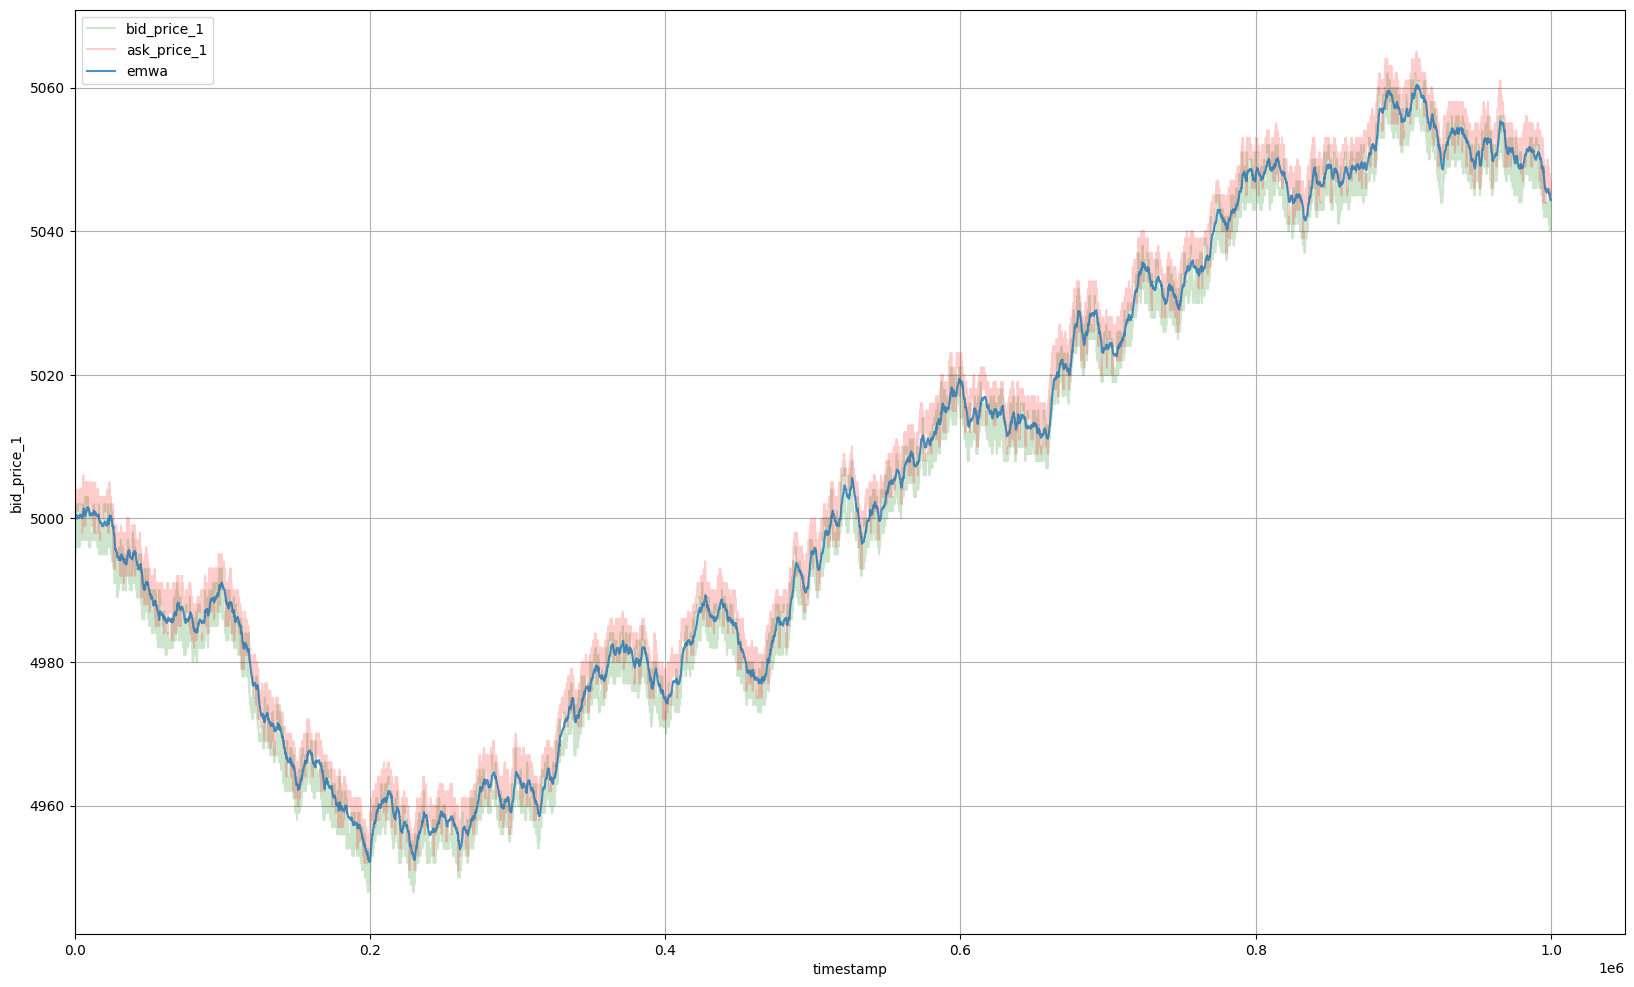

In [61]:
plt.figure(figsize=(20, 12))
plt.grid(True)
sns.lineplot(data=starfruit_df, x="timestamp", y="bid_price_1", errorbar=None, label="bid_price_1", alpha=0.2, color="green")
sns.lineplot(data=starfruit_df, x="timestamp", y="ask_price_1", errorbar=None, label="ask_price_1", alpha=0.2, color="red")
# sns.lineplot(data=starfruit_df, x="timestamp", y="mid_price", errorbar=None, label="mid_price", alpha=0.3)
sns.lineplot(data=starfruit_df, x="timestamp", y="emwa", errorbar=None, label="emwa", alpha=0.8)
plt.xlim(0)
# plt.ylim(4940, 5020)